In [1]:
%matplotlib inline
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preprocess

In [2]:
data = pd.read_csv("data/fillna_zeros.csv")

In [3]:
total_num = len(data)
test_num = np.int(0.3 * total_num)

In [4]:
train = data[0:-test_num]
test = data[-test_num:]

In [5]:
columns = data.columns
features = [f for f in columns if f not in ['datetime', 'PM2.5', 'PM10', 'WIND_DIREC', 'WD_HR']]
print features

['AMB_TEMP', 'CO', 'NO', 'NO2', 'NOx', 'O3', 'RAINFALL', 'RH', 'SO2', 'WIND_SPEED', 'WS_HR']


In [6]:
X_train, y_train = train[features], train['PM2.5']
X_test, y_test = test[features], test['PM2.5']

# Linear Regression

In [7]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print 'Coefficients: \n', regr.coef_

Coefficients: 
[ -4.84359188e-01   2.22651874e+01  -3.41139273e-01   1.51129063e-01
   2.40731752e-01   2.90355495e-01  -1.26671210e-02  -1.06450521e-01
   1.68507065e+00  -3.44292707e+00   1.24601057e+00]


In [8]:
y_predict = regr.predict(X_test)

# Result

In [9]:
#print y_predict, y_test

# Plot

In [10]:
predict_max = max(y_predict)
test_max = max(y_test)
both_max = max(predict_max, test_max)
print both_max

267.0


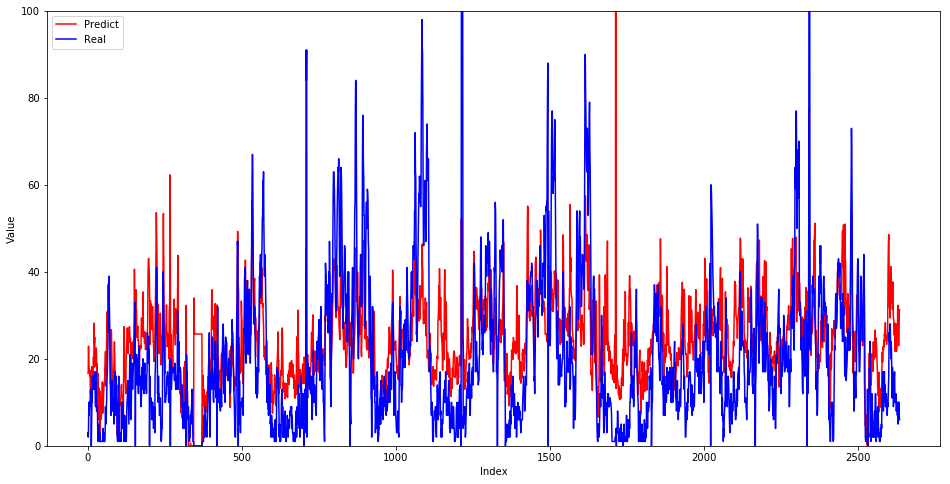

In [35]:
plt.xlabel("Index")
plt.ylabel("Value")
y_predict = [round(y, 1) if y > 0 else 0 for y in y_predict]
y_test_round = [round(y, 1) if y > 0 else 0 for y in y_test]
plt.plot(y_predict, color="red", label="Predict")
plt.plot(y_test_round, color="blue", label="Real")
plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] = [16.0, 8.0]
plt.ylim(0,100)
plt.show()

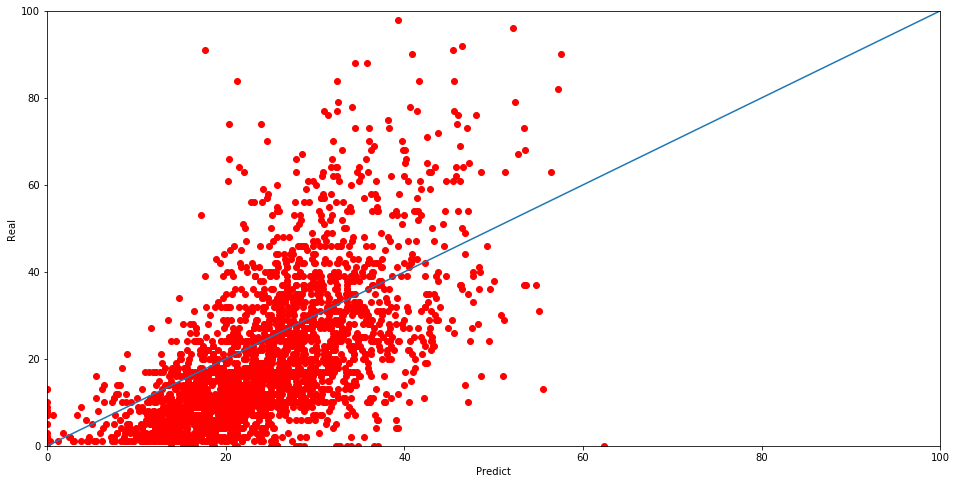

In [34]:
plt.rcParams['figure.figsize'] = [16.0, 8.0]
plt.xlabel('Predict')
plt.ylabel('Real')
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot(y_predict, y_test, 'ro')
plt.plot([0, both_max], [0, both_max])
plt.show()

# Measure

In [13]:
print("Mean squared error: %.2f"
      % np.mean((y_predict - y_test) ** 2))

Mean squared error: 253.30
